In [1]:
import pandas as pd
from sklearn import decomposition, cluster, manifold
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import openml

np.random.seed(11)

%matplotlib inline

# Building dataframe

In [2]:
data = [
    ["anneal", 2, "https://www.openml.org/d/2", 39, 6, 33, 898, 5, 22175],
    ["kr-vs-kp", 3, "https://www.openml.org/d/3", 37, 0, 37, 3196, 2, 0],
    ["arrhythmia", 5, "https://www.openml.org/d/5", 280, 206, 74, 452, 13, 408],
    ["mfeat.", 12, "https://www.openml.org/d/12", 217, 216, 1, 2000, 10, 0],
    ["credit-g", 31, "https://www.openml.org/d/31", 21, 7, 14, 1000, 2, 0],
    ["vehicle", 54, "https://www.openml.org/d/54", 19, 18, 1, 846, 4, 0],
    ["kc1", 1067, "https://www.openml.org/d/1067", 22, 21, 1, 2109, 2, 0],
    ["adult", 1590, "https://www.openml.org/d/1590", 15, 6, 9, 48842, 2, 6465],
    ["walking.", 1509, "https://www.openml.org/d/1509", 5, 4, 1, 149332, 22, 0],
    ["phoneme", 1489, "https://www.openml.org/d/1489", 6, 5, 1, 5404, 2, 0],
    ["skin-seg", 1502, "https://www.openml.org/d/1502", 4, 3, 1, 245057, 2, 0],
    ["ldpa", 1483, "https://www.openml.org/d/1483", 8, 5, 3, 164860, 11, 0],
    ["nomao", 1486, "https://www.openml.org/d/1486", 119, 89, 30, 34465, 2, 0],
    ["cnae", 1468, "https://www.openml.org/d/1468", 857, 856, 1, 1080, 9, 0],
    ["blood.", 1464, "https://www.openml.org/d/1464", 5, 4, 1, 748, 2, 0],
    ["bank.", 1461, "https://www.openml.org/d/1461", 17, 7, 10, 45211, 2, 0],
    ["connect.", 40668, "https://www.openml.org/d/40668", 43, 0, 43, 67557, 3, 0],
    ["shuttle", 40685, "https://www.openml.org/d/40685", 10, 9, 1, 58000, 7, 0],
    ["higgs", 23512, "https://www.openml.org/d/23512", 29, 28, 1, 98050, 2, 9],
    ["australian", 40981, "https://www.openml.org/d/40981", 15, 6, 9, 690, 2, 0],
    ["car", 40975, "https://www.openml.org/d/40975", 7, 0, 7, 1728, 4, 0],
    ["segment", 40984, "https://www.openml.org/d/40984", 20, 19, 1, 2310, 7, 0],
    ["fashion.", 40996, "https://www.openml.org/d/40996", 785, 784, 1, 70000, 10, 0],
    ["jungle.", 41027, "https://www.openml.org/d/41027", 7, 6, 1, 44819, 3, 0],
    ["numerai", 23517, "https://www.openml.org/d/23517", 22, 21, 1, 96320, 2, 0],
    ["devnagari", 40923, "https://www.openml.org/d/40923", 1025, 1024, 1, 92000, 46, 0],
    ["helena", 41169, "https://www.openml.org/d/41169", 28, 27, 1, 65196, 100, 0],
    ["jannis", 41168, "https://www.openml.org/d/41168", 55, 54, 1, 83733, 4, 0],
    ["volkert", 41166, "https://www.openml.org/d/41166", 181, 180, 1, 58310, 10, 0],
    ["miniboone", 41150, "https://www.openml.org/d/41150", 51, 50, 1, 130064, 2, 0],
    ["apsfailure", 41138, "https://www.openml.org/d/41138", 171, 170, 1, 76000, 2, 1078695],
    ["christine", 41142, "https://www.openml.org/d/41142", 1637, 1599, 38, 5418, 2, 0],
    ["dilbert", 41163, "https://www.openml.org/d/41163", 2001, 2000, 1, 10000, 5, 0],
    ["fabert", 41164, "https://www.openml.org/d/41164", 801, 800, 1, 8237, 7, 0],
    ["jasmine", 41143, "https://www.openml.org/d/41143", 145, 8, 137, 2984, 2, 0],
    ["sylvine", 41146, "https://www.openml.org/d/41146", 21, 20, 1, 5124, 2, 0],
    ["dionis", 41167, "https://www.openml.org/d/41167", 61, 60, 1, 416188, 355, 0],
    ["aloi", 42396, "https://www.openml.org/d/42396", 129, 128, 1, 108000, 1000, 0],
    ["ccfraud", 42397, "https://www.openml.org/d/42397", 31, 30, 1, 284807, 2, 0],
    ["clickpred.", 1219, "https://www.openml.org/d/1219", 12, 11, 1, 399482, 2, 0],
    ["Covertype", 293, "https://www.openml.org/d/293", 55, 54, 1, 581012, 7, 0],
    ["albert", 41147, "https://www.openml.org/d/41147", 79, 26, 53, 425240, 2, 2734000],
    ["blastchar", 42178, "https://www.openml.org/d/42178", 20, 3, 17, 7043, 2, 0],
    ["online-shoopers", 42993, "https://www.openml.org/d/42993", 18, 14, 4, 12330, 2, 0],
    ["philippine", 41145, "https://www.openml.org/d/41145", 309, 308, 1, 5832, 2, 0],
    ["qsar", 1494, "https://www.openml.org/d/1494", 42, 41, 1, 1055, 2, 0],
    ["spambase", 44, "https://www.openml.org/d/44", 58, 57, 1, 4601, 2, 0]
]

In [3]:
df = pd.DataFrame(data, columns=["name", "id", "link", "n_features", "n_numerical", "n_categorical", "n_instances", "n_classes", "n_missing_values"])

In [4]:
df

,name,id,link,n_features,n_numerical,n_categorical,n_instances,n_classes,n_missing_values
0,anneal,2,https://www.openml.org/d/2,39,6,33,898,5,22175
1,kr-vs-kp,3,https://www.openml.org/d/3,37,0,37,3196,2,0
2,arrhythmia,5,https://www.openml.org/d/5,280,206,74,452,13,408
3,mfeat.,12,https://www.openml.org/d/12,217,216,1,2000,10,0
4,credit-g,31,https://www.openml.org/d/31,21,7,14,1000,2,0
5,vehicle,54,https://www.openml.org/d/54,19,18,1,846,4,0
6,kc1,1067,https://www.openml.org/d/1067,22,21,1,2109,2,0
7,adult,1590,https://www.openml.org/d/1590,15,6,9,48842,2,6465
8,walking.,1509,https://www.openml.org/d/1509,5,4,1,149332,22,0
9,phoneme,1489,https://www.openml.org/d/1489,6,5,1,5404,2,0


In [5]:
df = df[df["n_features"] <= 200].reset_index()

In [6]:
df

,index,name,id,link,n_features,n_numerical,n_categorical,n_instances,n_classes,n_missing_values
0,0,anneal,2,https://www.openml.org/d/2,39,6,33,898,5,22175
1,1,kr-vs-kp,3,https://www.openml.org/d/3,37,0,37,3196,2,0
2,4,credit-g,31,https://www.openml.org/d/31,21,7,14,1000,2,0
3,5,vehicle,54,https://www.openml.org/d/54,19,18,1,846,4,0
4,6,kc1,1067,https://www.openml.org/d/1067,22,21,1,2109,2,0
5,7,adult,1590,https://www.openml.org/d/1590,15,6,9,48842,2,6465
6,8,walking.,1509,https://www.openml.org/d/1509,5,4,1,149332,22,0
7,9,phoneme,1489,https://www.openml.org/d/1489,6,5,1,5404,2,0
8,10,skin-seg,1502,https://www.openml.org/d/1502,4,3,1,245057,2,0
9,11,ldpa,1483,https://www.openml.org/d/1483,8,5,3,164860,11,0


# Retrieve meta and validate

In [7]:
datasets = openml.datasets.get_datasets(dataset_ids=df["id"].values.tolist(), download_data=False)

In [8]:
np.all(df["n_categorical"].values == np.array([len(ds.get_features_by_type("nominal")) + len(ds.get_features_by_type("string")) for ds in datasets]))

True

# Adding new features

In [9]:
df["features_instances"] = df["n_features"] / df["n_instances"]
df["percent_numerical"] = df["n_numerical"] / (df["n_features"] - 1)
df["percent_missing_values"] =  df["n_missing_values"] / ((df["n_numerical"] + df["n_categorical"] - 1) * df["n_instances"])

In [10]:
vectors = df[["features_instances", "percent_numerical", "percent_missing_values"]].values


# Plots

In [11]:
#pca = decomposition.PCA(n_components=2)
pca = manifold.TSNE(n_components=2)
plot_vectors = pca.fit_transform(vectors)

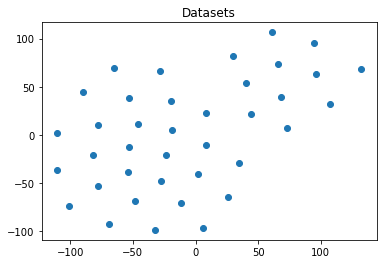

In [12]:
plt.title("Datasets")
_ = plt.scatter(plot_vectors[:, 0], plot_vectors[:, 1])

In [13]:
# clustering = cluster.DBSCAN(eps=0.1)
clustering = cluster.KMeans(n_clusters=5)
clustering.fit(vectors)

KMeans(n_clusters=5)

In [14]:
colors = ["red", "green", "blue", "purple", "gray", "orange", "pink", "cyan", "black"]
print("Available labels:", set(clustering.labels_))

Available labels: {0, 1, 2, 3, 4}


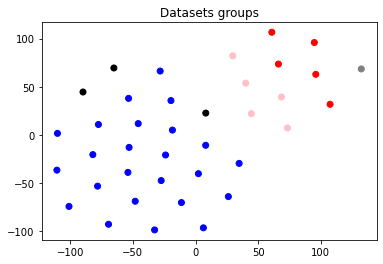

In [15]:
plt.title("Datasets groups")
_ = plt.scatter(
    plot_vectors[:, 0], 
    plot_vectors[:, 1], 
    c=clustering.labels_, 
    cmap=matplotlib.colors.ListedColormap(colors)
)

# Sampling test datasets

In [16]:
# Select all with -1
selected = []

In [17]:
all_labels = set(clustering.labels_)
print("Avaliable labels", all_labels)

Avaliable labels {0, 1, 2, 3, 4}


In [18]:
np.argmin(np.matmul(vectors[np.argwhere(clustering.labels_ == 0).flatten()], clustering.cluster_centers_[0].T))

1

In [19]:
for label in all_labels:
    # Random selection
    # selected.append(np.random.choice(np.argwhere(clustering.labels_ == label).flatten()))
    
    # Select the closer one to the center
    ds_indices = np.argwhere(clustering.labels_ == label).flatten() 
    cluster_center = clustering.cluster_centers_[label]
    distances = np.sqrt(np.sum((vectors[ds_indices] - cluster_center) ** 2, axis=-1))
    
    assert ds_indices.shape == distances.shape
    
    selected.append(ds_indices[np.argmin(distances)])   
    

In [20]:
# [0, 2, 4, 7, 11, 13, 15, 16, 19, 20, 17]
print("Selected datasets are:", selected)

Selected datasets are: [26, 27, 0, 5, 10]


In [21]:
df["label"] = clustering.labels_

In [22]:
df.iloc[selected]

,index,name,id,link,n_features,n_numerical,n_categorical,n_instances,n_classes,n_missing_values,features_instances,percent_numerical,percent_missing_values,label
26,34,jasmine,41143,https://www.openml.org/d/41143,145,8,137,2984,2,0,0.048592,0.055556,0.000000,0
27,35,sylvine,41146,https://www.openml.org/d/41146,21,20,1,5124,2,0,0.004098,1.000000,0.000000,1
0,0,anneal,2,https://www.openml.org/d/2,39,6,33,898,5,22175,0.043430,0.157895,0.649836,2
5,7,adult,1590,https://www.openml.org/d/1590,15,6,9,48842,2,6465,0.000307,0.428571,0.009455,3
10,12,nomao,1486,https://www.openml.org/d/1486,119,89,30,34465,2,0,0.003453,0.754237,0.000000,4
